In [1]:
import pandas as pd

In [4]:
features=pd.read_csv('features.csv')
stores=pd.read_csv('stores.csv')
train=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [5]:
print(features.head())
print(stores.head())
print(train.head())
print(test.head())


   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05-02-2010        42.31       2.572        NaN        NaN   
1      1  12-02-2010        38.51       2.548        NaN        NaN   
2      1  19-02-2010        39.93       2.514        NaN        NaN   
3      1  26-02-2010        46.63       2.561        NaN        NaN   
4      1  05-03-2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   348

In [6]:
#checking null values 

print(features.isna().sum())
print(stores.isna().sum())
print(train.isna().sum())
print(test.isna().sum())


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Store    0
Type     0
Size     0
dtype: int64
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


In [8]:
# Handling MarkDown columns:
features['MarkDown1'].fillna(0, inplace=True)
features['MarkDown2'].fillna(0, inplace=True)
features['MarkDown3'].fillna(0, inplace=True)
features['MarkDown4'].fillna(0, inplace=True)
features['MarkDown5'].fillna(0, inplace=True)

# Using linear interpolation for missing values in CPI and Unemployment columns:
features['CPI'] = features['CPI'].interpolate(method='linear')
features['Unemployment'] = features['Unemployment'].interpolate(method='linear')

# Recheck for missing values after interpolation:
print(features.isnull().sum())




Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [9]:
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])


C:\Users\ankiy\AppData\Local\Temp\ipykernel_25908\1543809726.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  features['Date'] = pd.to_datetime(features['Date'])


In [12]:
train_merged = pd.merge(train, stores, on='Store', how='left')
train_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [14]:
train_merged_features = pd.merge(train_merged, features, on=['Store', 'Date'], how='left')
train_merged_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,True,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


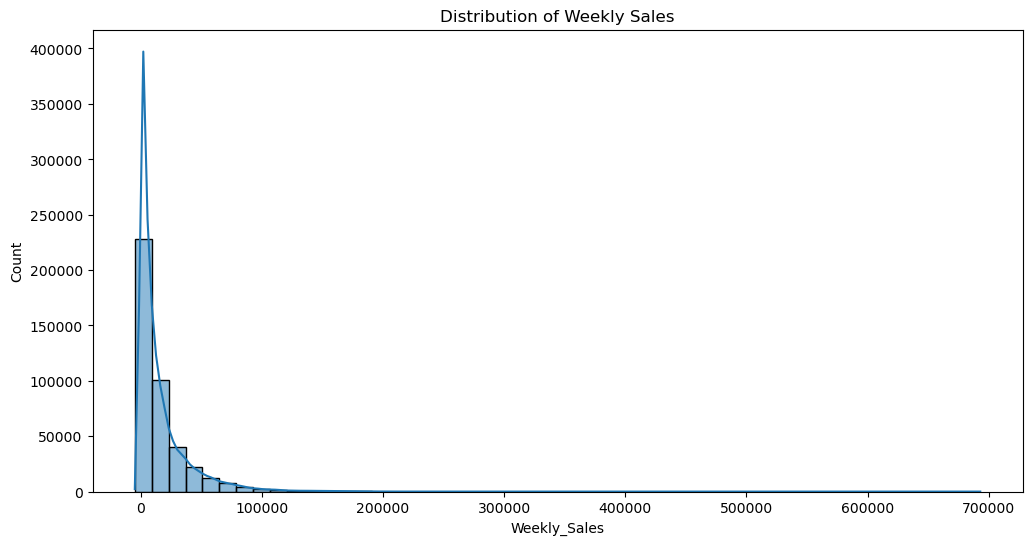

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(train_merged_features['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.show()


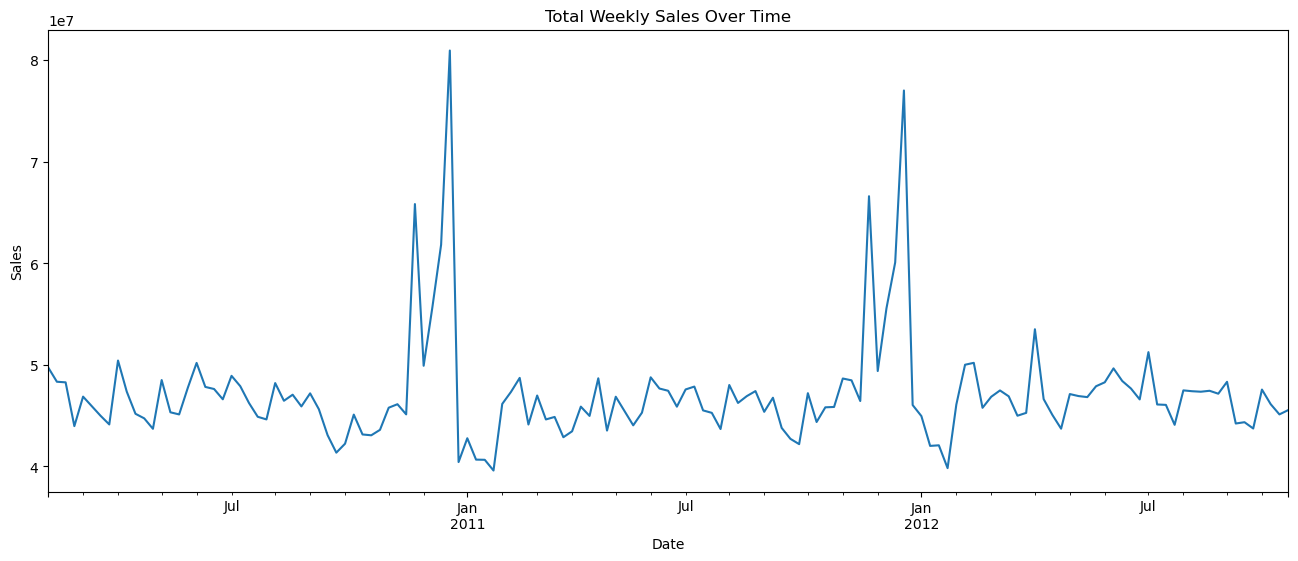

In [16]:
# First, let's convert 'Date' column to datetime type if you haven't done it yet
Train['Date'] = pd.to_datetime(Train['Date'])

plt.figure(figsize=(16, 6))
Train.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Sales')
plt.show()


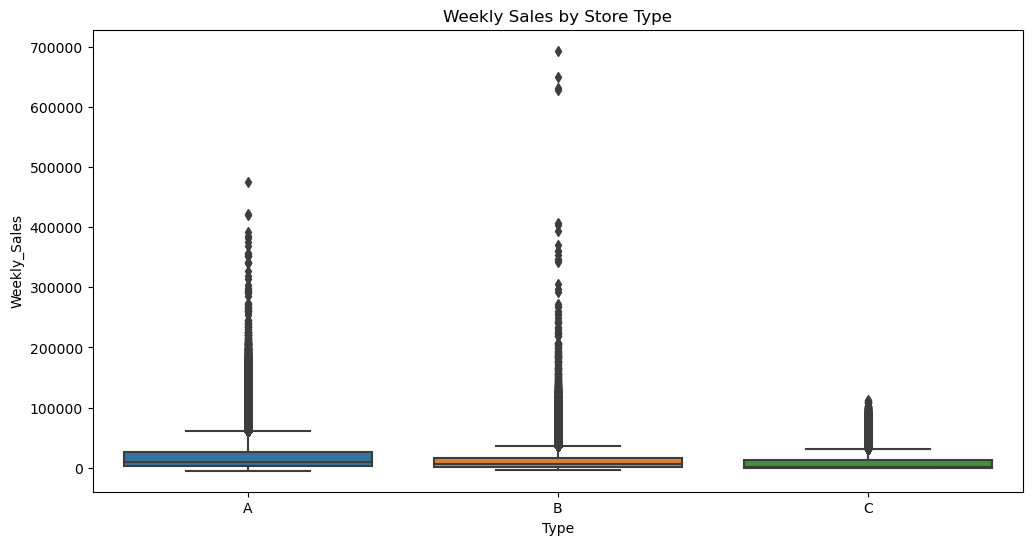

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=train_merged_features)
plt.title('Weekly Sales by Store Type')
plt.show()


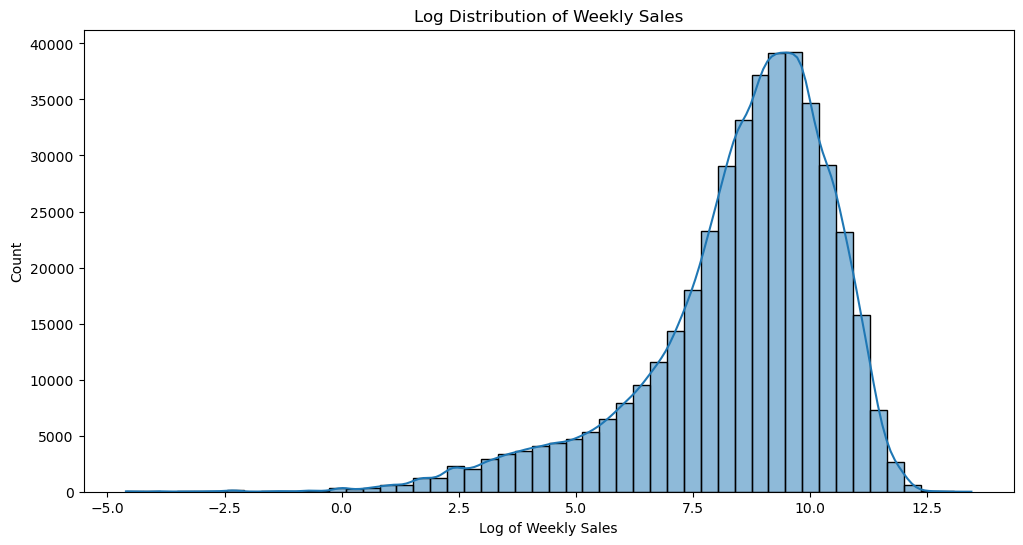

In [19]:
import numpy as np

# Removing zeros and negative values before applying log
positive_sales = train_merged_features['Weekly_Sales'][train_merged_features['Weekly_Sales'] > 0]

plt.figure(figsize=(12, 6))
sns.histplot(np.log(positive_sales), bins=50, kde=True)
plt.title('Log Distribution of Weekly Sales')
plt.xlabel('Log of Weekly Sales')
plt.show()


In [34]:
train_merged_features.drop('IsHoliday', axis=1, inplace=True)
train_merged_features.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)


In [35]:
print(train_merged_features.columns)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')


In [36]:
train_merged_features['IsHoliday'] = train_merged_features['IsHoliday'].astype(int)


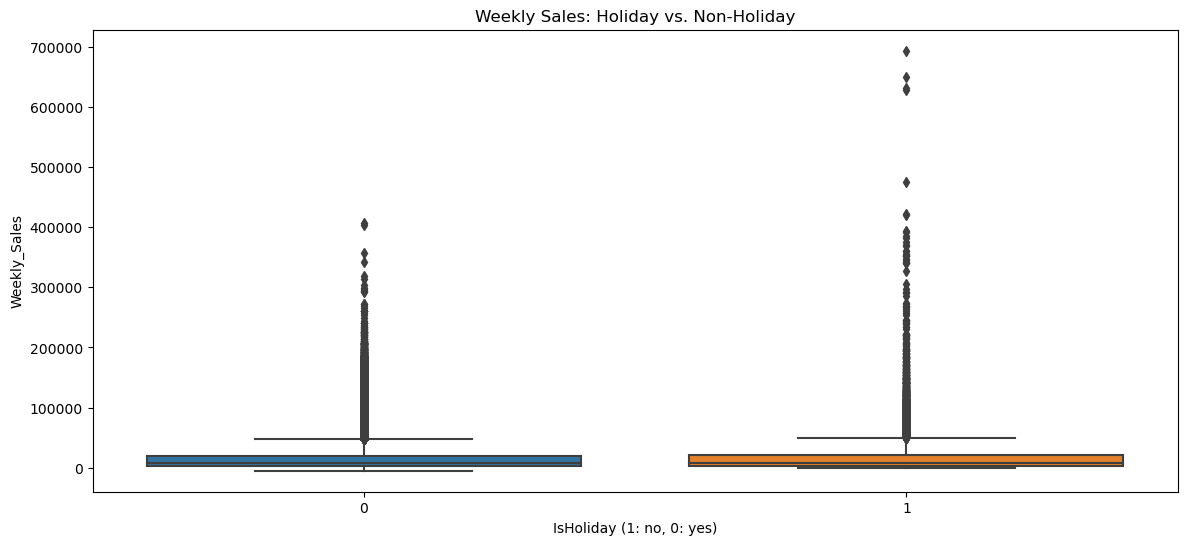

In [38]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train_merged_features)
plt.title('Weekly Sales: Holiday vs. Non-Holiday')
plt.xlabel('IsHoliday (1: no, 0: yes)')
plt.show()


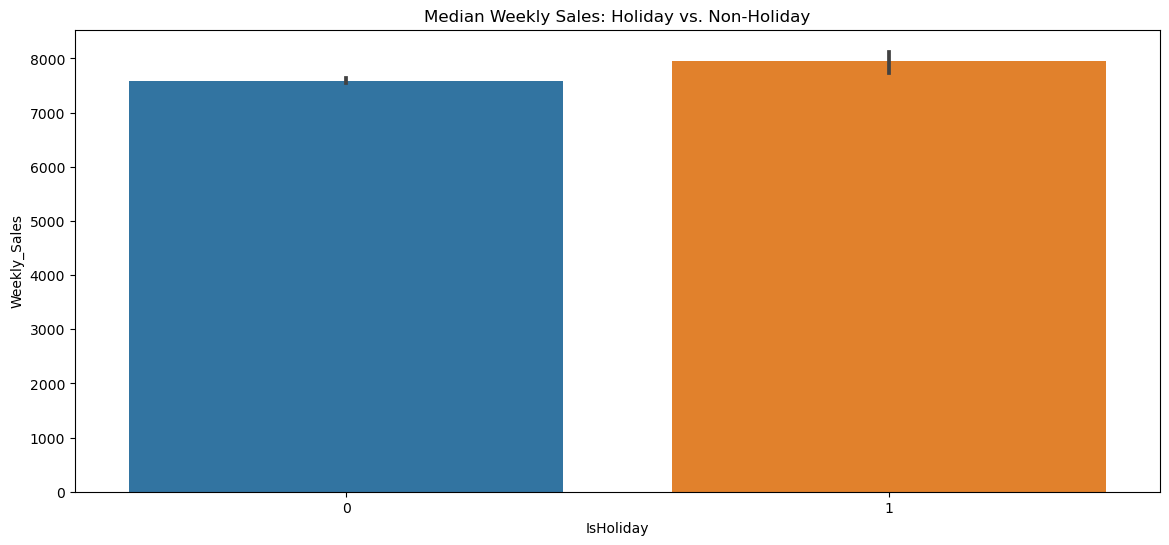

In [40]:
plt.figure(figsize=(14, 6))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train_merged_features, estimator=np.median)
plt.title('Median Weekly Sales: Holiday vs. Non-Holiday')
plt.show()


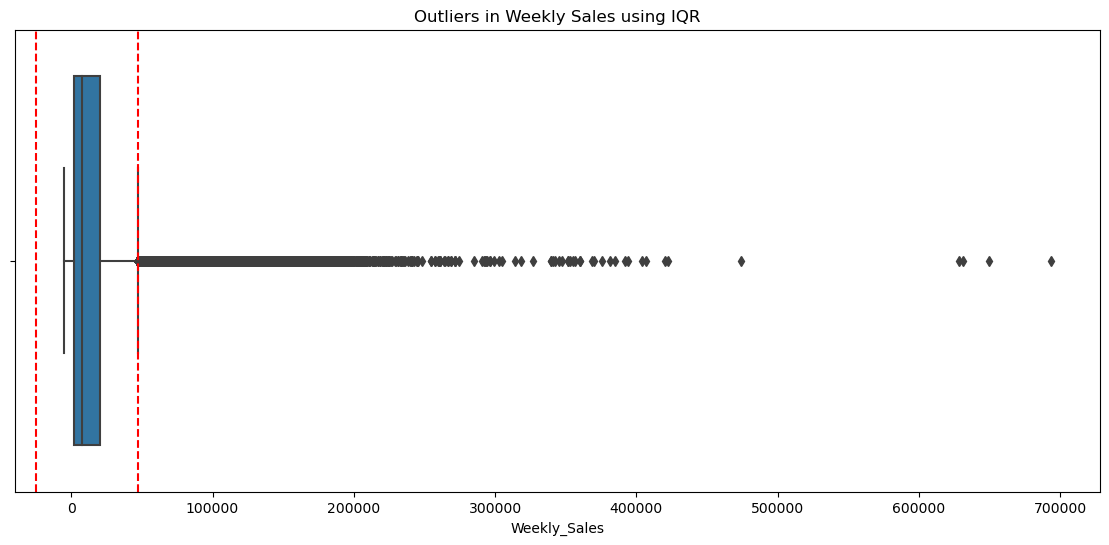

Number of Outliers: 35521


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1, Q3, and IQR
Q1 = train_merged_features['Weekly_Sales'].quantile(0.25)
Q3 = train_merged_features['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Visualize the data
plt.figure(figsize=(14, 6))

sns.boxplot(x=train_merged_features['Weekly_Sales'])
plt.axvline(x=lower_bound, color='red', linestyle='--')
plt.axvline(x=upper_bound, color='red', linestyle='--')
plt.title('Outliers in Weekly Sales using IQR')
plt.show()

# Print outliers
outliers = train_merged_features[(train_merged_features['Weekly_Sales'] < lower_bound) | (train_merged_features['Weekly_Sales'] > upper_bound)]
print("Number of Outliers:", outliers.shape[0])

In [42]:
# Calculate the IQR for Weekly_Sales
Q1 = train_merged_features['Weekly_Sales'].quantile(0.25)
Q3 = train_merged_features['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = train_merged_features[(train_merged_features['Weekly_Sales'] < lower_bound) | (train_merged_features['Weekly_Sales'] > upper_bound)]

# Group by IsHoliday and count
outliers_grouped = outliers.groupby('IsHoliday').size()

print(outliers_grouped)


IsHoliday
0    32903
1     2618
dtype: int64


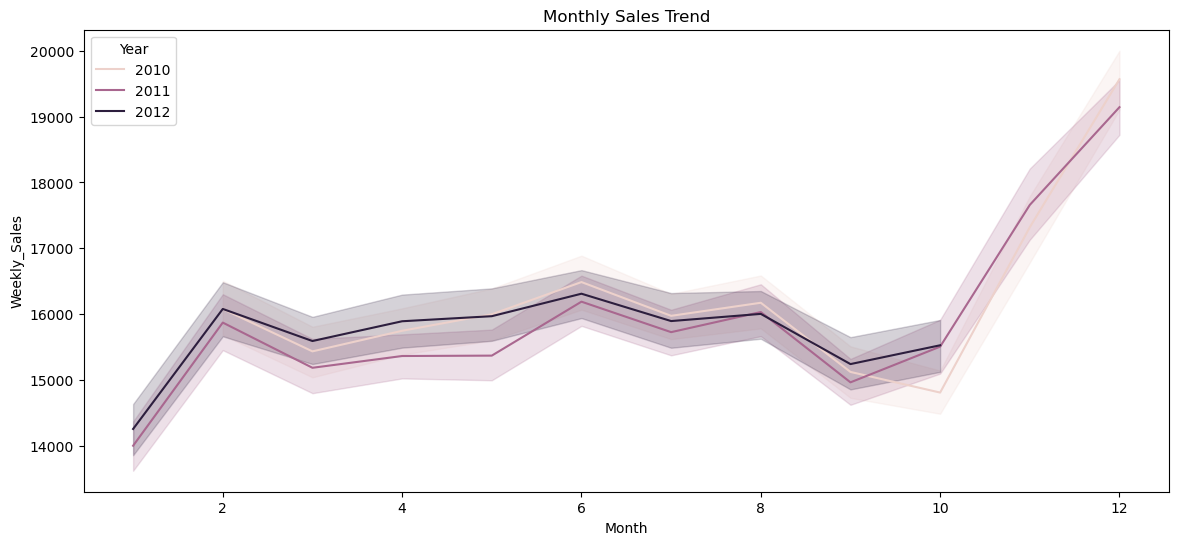

In [43]:
# Extract month and year from the Date
train_merged_features['Year'] = pd.to_datetime(train_merged_features['Date']).dt.year
train_merged_features['Month'] = pd.to_datetime(train_merged_features['Date']).dt.month

plt.figure(figsize=(14,6))
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=train_merged_features)
plt.title('Monthly Sales Trend')
plt.show()


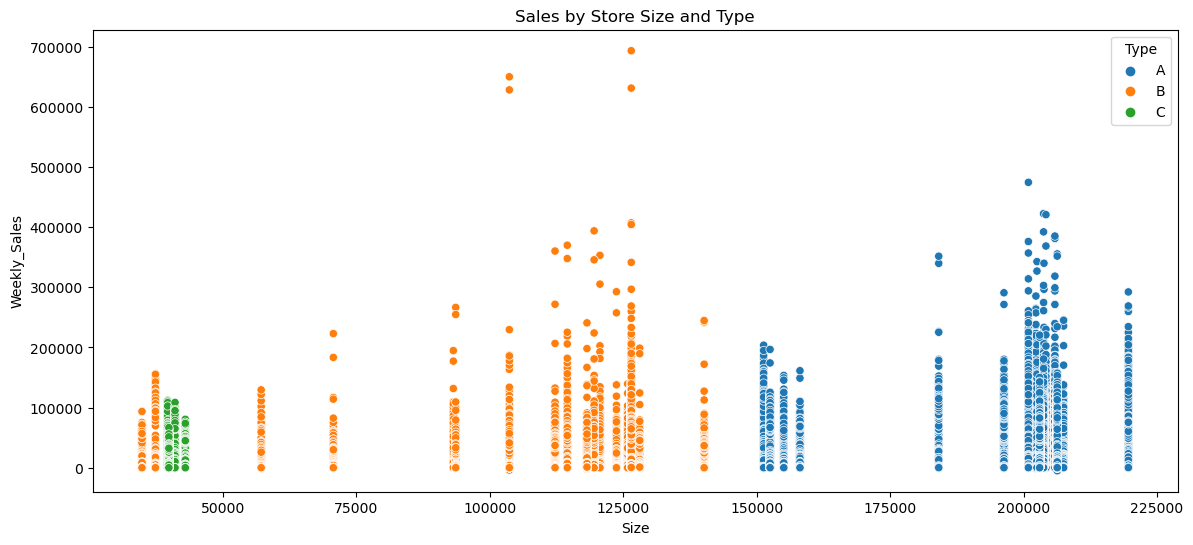

In [44]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='Size', y='Weekly_Sales', data=train_merged_features, hue='Type')
plt.title('Sales by Store Size and Type')
plt.show()


C:\Users\ankiy\AppData\Local\Temp\ipykernel_25908\1369468611.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_merged_features.corr(), annot=True, cmap='coolwarm')


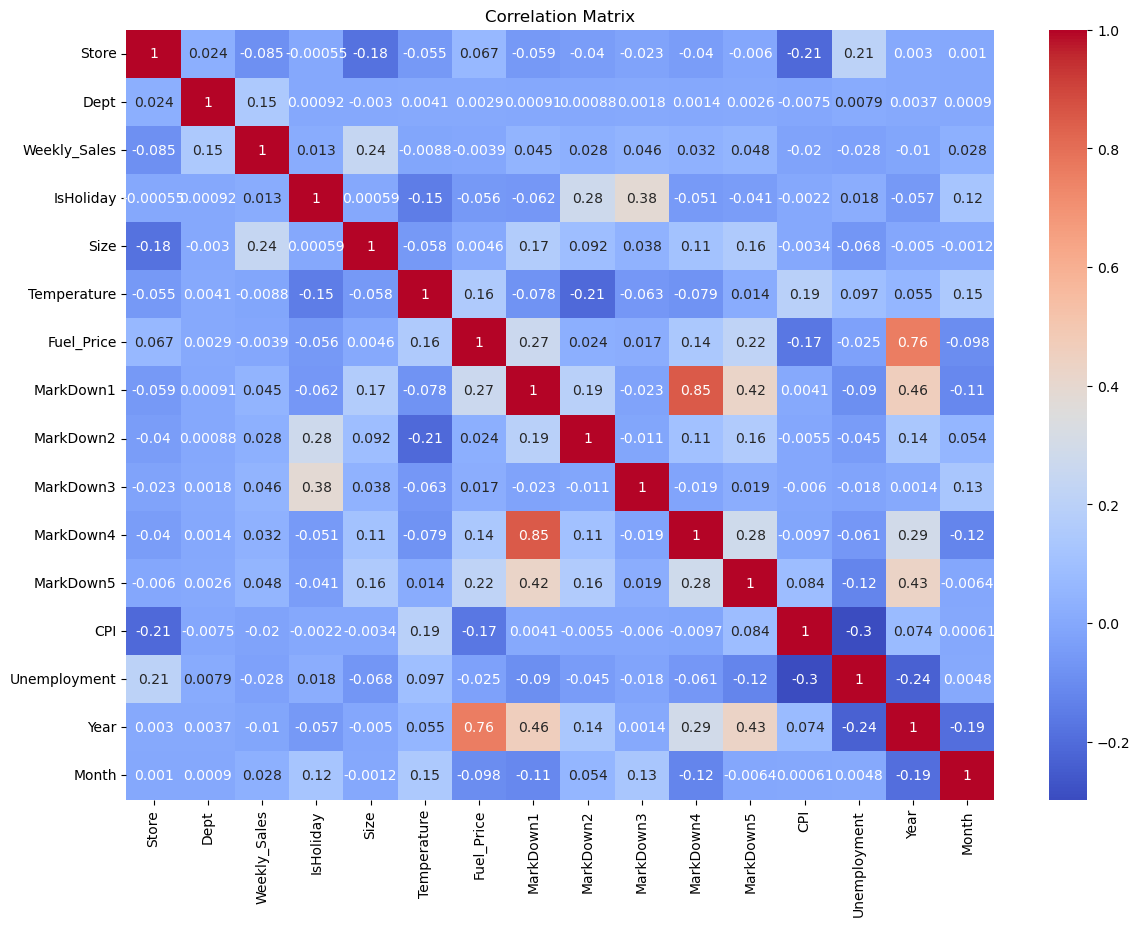

In [45]:
plt.figure(figsize=(14,10))
sns.heatmap(train_merged_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [47]:
train_merged_features.describe

<bound method NDFrame.describe of         Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50          0    A  151315   
1           1     1 2010-02-12      46039.49          1    A  151315   
2           1     1 2010-02-19      41595.55          0    A  151315   
3           1     1 2010-02-26      19403.54          0    A  151315   
4           1     1 2010-03-05      21827.90          0    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    98 2012-09-28        508.37          0    B  118221   
421566     45    98 2012-10-05        628.10          0    B  118221   
421567     45    98 2012-10-12       1061.02          0    B  118221   
421568     45    98 2012-10-19        760.01          0    B  118221   
421569     45    98 2012-10-26       1076.80          0    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0               NaN   

In [48]:
# One-hot encode 'Type'
encoded_types = pd.get_dummies(train_merged_features['Type'], prefix='Type', drop_first=True)

# Concatenate the encoded columns to the original dataframe
train_merged_features = pd.concat([train_merged_features, encoded_types], axis=1)

# Drop the original 'Type' column
train_merged_features.drop('Type', axis=1, inplace=True)


In [49]:
train_merged_features

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2,0,0
1,1,1,2010-02-12,46039.49,1,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2,0,0
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,2010,2,0,0
3,1,1,2010-02-26,19403.54,0,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,2010,2,0,0
4,1,1,2010-03-05,21827.90,0,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,1,0
421566,45,98,2012-10-05,628.10,0,118221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,10,1,0
421567,45,98,2012-10-12,1061.02,0,118221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,10,1,0
421568,45,98,2012-10-19,760.01,0,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,2012,10,1,0


In [50]:
# Convert 'Date' to datetime type if it isn't already
train_merged_features['Date'] = pd.to_datetime(train_merged_features['Date'])

# Extract year, month, day, and weekday
train_merged_features['Year'] = train_merged_features['Date'].dt.year
train_merged_features['Month'] = train_merged_features['Date'].dt.month
train_merged_features['Day'] = train_merged_features['Date'].dt.day
train_merged_features['Weekday'] = train_merged_features['Date'].dt.weekday


In [51]:
train_merged_features['IsWeekend'] = train_merged_features['Weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [55]:
print('Weekday' in train_merged_features.columns)
print('IsWeekend' in train_merged_features.columns)


True
True


In [54]:
train_merged_features

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,Year,Month,Type_B,Type_C,Day,Weekday,IsWeekend
0,1,1,2010-02-05,24924.50,0,151315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2010,2,0,0,5,4,0
1,1,1,2010-02-12,46039.49,1,151315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2010,2,0,0,12,4,0
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,0.00,0.00,...,0.00,211.289143,8.106,2010,2,0,0,19,4,0
3,1,1,2010-02-26,19403.54,0,151315,46.63,2.561,0.00,0.00,...,0.00,211.319643,8.106,2010,2,0,0,26,4,0
4,1,1,2010-03-05,21827.90,0,151315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2010,3,0,0,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,118221,64.88,3.997,4556.61,20.64,...,3288.25,192.013558,8.684,2012,9,1,0,28,4,0
421566,45,98,2012-10-05,628.10,0,118221,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2012,10,1,0,5,4,0
421567,45,98,2012-10-12,1061.02,0,118221,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2012,10,1,0,12,4,0
421568,45,98,2012-10-19,760.01,0,118221,56.47,3.969,2004.02,0.00,...,1537.49,192.330854,8.667,2012,10,1,0,19,4,0


In [58]:
train_merged_features['Weekday'] = train_merged_features['Weekday'].astype(int)
train_merged_features['IsWeekend'] = train_merged_features['IsWeekend'].astype(int)


C:\Users\ankiy\AppData\Local\Temp\ipykernel_25908\808746668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_merged_features.corr()


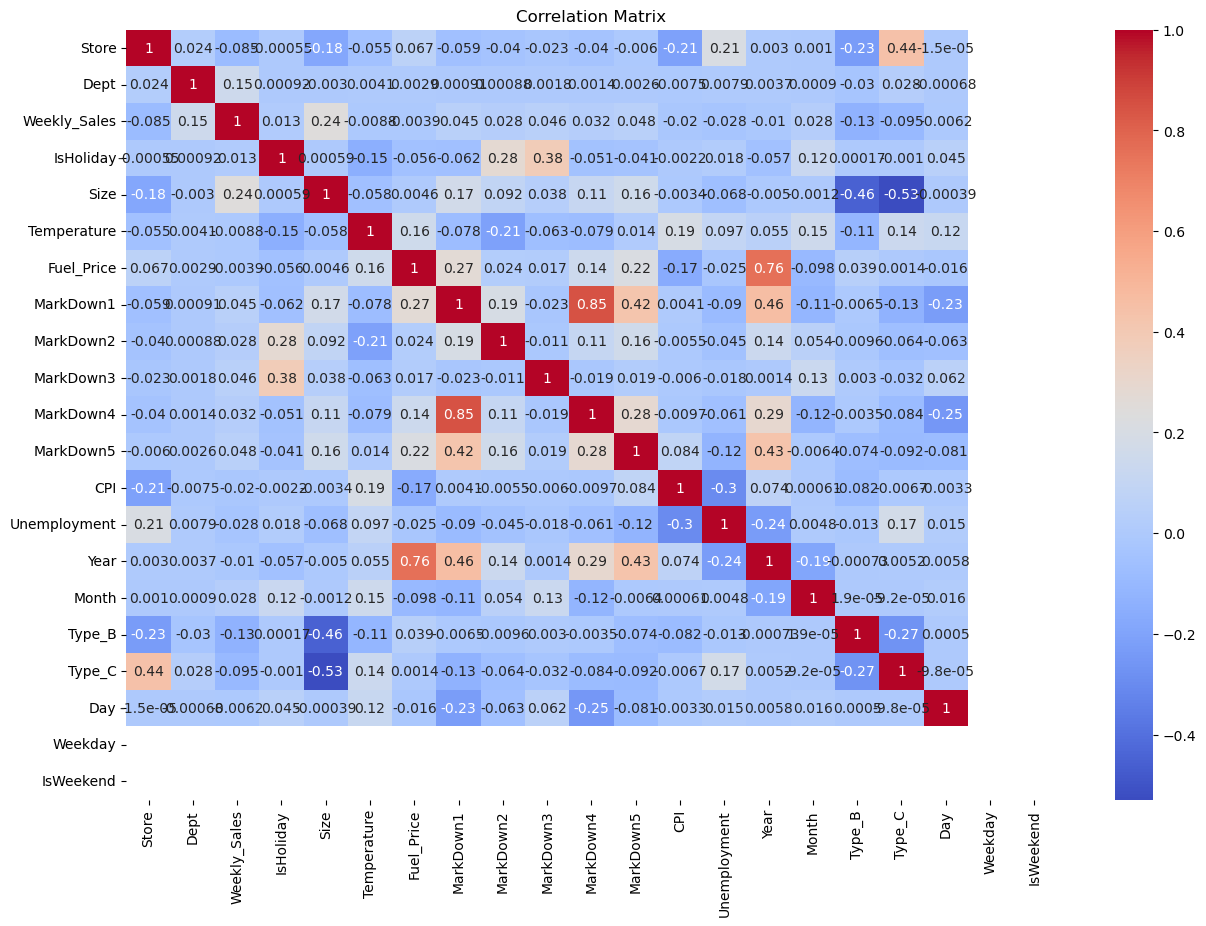

In [59]:
corr_matrix = train_merged_features.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [60]:
train_merged_features['Date'] = pd.to_datetime(train_merged_features['Date'])
train_merged_features.set_index('Date', inplace=True)


In [61]:
store1_dept1 = train_merged_features[(train_merged_features['Store'] == 1) & (train_merged_features['Dept'] == 1)]


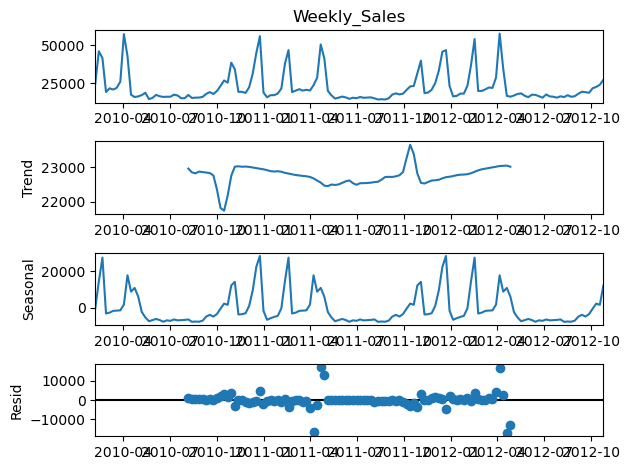

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(store1_dept1['Weekly_Sales'], model='additive', period=52)  # Using a yearly frequency/period

result.plot()
plt.show()


In [64]:
train_merged_features.isna().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Size                 0
Temperature     138586
Fuel_Price      138586
MarkDown1       138586
MarkDown2       138586
MarkDown3       138586
MarkDown4       138586
MarkDown5       138586
CPI             138586
Unemployment    138586
Year                 0
Month                0
Type_B               0
Type_C               0
Day                  0
Weekday              0
IsWeekend            0
dtype: int64

In [65]:
test_merged = pd.merge(test, stores, on='Store', how='left')


In [66]:
test_merged_features = pd.merge(test_merged, features, on=['Store', 'Date'], how='left')


In [69]:
test_merged_features.drop('IsHoliday_y', axis=1, inplace=True)
test_merged_features.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)

In [70]:
test_merged_features

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2012-11-09,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335
115060,45,98,2013-07-05,False,B,118221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335


In [71]:
test_merged_features['IsHoliday'] = test_merged_features['IsHoliday'].astype(int)


In [73]:
test_merged_features['Date'] = pd.to_datetime(test['Date'])
test_merged_features['Year'] = test['Date'].dt.year
test_merged_features['Month'] = test['Date'].dt.month
test_merged_features['Day'] = test['Date'].dt.day
test_merged_features['Weekday'] = test['Date'].dt.weekday


In [75]:
test_merged_features['IsWeekend'] = test_merged_features['Weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [77]:
# One-hot encoding the 'Type' column for the test dataset
test_merged_features = pd.get_dummies(test_merged_features, columns=['Type'], drop_first=True)

# Drop the 'Date' column from test_merged_features as it's not in the train dataset
test_merged_features.drop(columns=['Date'], inplace=True)

# Check the columns again to confirm the encoding
print("Updated Test Merged Features Columns:\n", test_merged_features.columns)


Updated Test Merged Features Columns:
 Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'Weekday', 'IsWeekend',
       'Type_B', 'Type_C'],
      dtype='object')


In [78]:
# Display columns of train_merged_features
print("Train Merged Features Columns:\n", train_merged_features.columns)
print("\n---------------------------------------\n")
# Display columns of test_merged_features
print("Test Merged Features Columns:\n", test_merged_features.columns)


Train Merged Features Columns:
 Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Type_B', 'Type_C',
       'Day', 'Weekday', 'IsWeekend'],
      dtype='object')

---------------------------------------

Test Merged Features Columns:
 Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'Weekday', 'IsWeekend',
       'Type_B', 'Type_C'],
      dtype='object')


In [80]:
from sklearn.model_selection import train_test_split

X = train_merged_features.drop('Weekly_Sales', axis=1)
y = train_merged_features['Weekly_Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#need to run this when you clear the output or restart the kernel

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [82]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Apply imputation on our data
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Train the model on the imputed data
rf.fit(X_train_imputed, y_train)


RandomForestRegressor(random_state=42)

In [83]:
from sklearn.metrics import r2_score

# Predict on the validation set
y_pred_val = rf.predict(X_val_imputed)

# Compute MAE, RMSE, and R^2
mae = mean_absolute_error(y_val, y_pred_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

# Print the metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


MAE: 1431.3051397264983
RMSE: 3720.2047736605923
R^2: 0.9734598400543991


In [84]:
importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'features': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
print(importance_df)


        features  importance
1           Dept    0.623743
3           Size    0.205544
0          Store    0.063160
14         Month    0.032663
17           Day    0.016291
8      MarkDown3    0.012318
15        Type_B    0.012006
11           CPI    0.010351
4    Temperature    0.005646
12  Unemployment    0.005365
5     Fuel_Price    0.003290
13          Year    0.003080
2      IsHoliday    0.002276
16        Type_C    0.001234
10     MarkDown5    0.000874
7      MarkDown2    0.000841
9      MarkDown4    0.000684
6      MarkDown1    0.000633
18       Weekday    0.000000
19     IsWeekend    0.000000


In [86]:
# Ensure that test_merged_features has the same columns as X_train
X_test = test_merged_features[X_train.columns]

# Apply imputation to the test dataset
X_test_imputed = imputer.transform(X_test)

# Predict using the trained random forest model
y_pred_test = rf.predict(X_test_imputed)


In [89]:
print(y_pred_test)  # print first 10 predictions to inspect


[32644.5473 23015.9338 19770.1908 ...   772.1217   693.9287   657.5372]


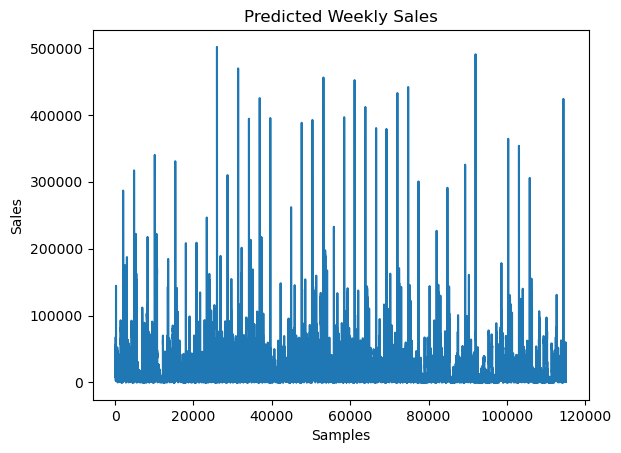

In [88]:
import matplotlib.pyplot as plt
plt.plot(y_pred_test)
plt.title("Predicted Weekly Sales")
plt.xlabel("Samples")
plt.ylabel("Sales")
plt.show()


In [92]:
# Assuming your test dataset is named "test_merged_features"

# Add the predicted values as a new column
test_merged_features['Predicted_Weekly_Sales'] = y_pred_test

# Create the new dataset
predicted_df = test_merged_features.copy()



In [97]:
predicted_df.columns

Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'Weekday', 'IsWeekend',
       'Type_B', 'Type_C', 'Predicted_Weekly_Sales'],
      dtype='object')

In [100]:
print(train_merged_features.head())
print(predicted_df.head())

            Store  Dept  Weekly_Sales  IsHoliday    Size  Temperature  \
Date                                                                    
2010-02-05      1     1      24924.50          0  151315          NaN   
2010-02-12      1     1      46039.49          1  151315          NaN   
2010-02-19      1     1      41595.55          0  151315        39.93   
2010-02-26      1     1      19403.54          0  151315        46.63   
2010-03-05      1     1      21827.90          0  151315          NaN   

            Fuel_Price  MarkDown1  MarkDown2  MarkDown3  ...  MarkDown5  \
Date                                                     ...              
2010-02-05         NaN        NaN        NaN        NaN  ...        NaN   
2010-02-12         NaN        NaN        NaN        NaN  ...        NaN   
2010-02-19       2.514        0.0        0.0        0.0  ...        0.0   
2010-02-26       2.561        0.0        0.0        0.0  ...        0.0   
2010-03-05         NaN        NaN     

In [102]:
#descriptive stATS

print("Train Data Descriptive Statistics:\n", train_merged_features.describe())
print("\nPredicted Data Descriptive Statistics:\n", predicted_df.describe())


Train Data Descriptive Statistics:
                Store           Dept   Weekly_Sales      IsHoliday  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123       0.070358   
std        12.785297      30.492054   22711.183519       0.255750   
min         1.000000       1.000000   -4988.940000       0.000000   
25%        11.000000      18.000000    2079.650000       0.000000   
50%        22.000000      37.000000    7612.030000       0.000000   
75%        33.000000      74.000000   20205.852500       0.000000   
max        45.000000      99.000000  693099.360000       1.000000   

                Size    Temperature     Fuel_Price      MarkDown1  \
count  421570.000000  282984.000000  282984.000000  282984.000000   
mean   136727.915739      59.935594       3.380391    2593.779213   
std     60980.583328      18.213063       0.448674    6212.159734   
min     34875.000000       5.540000       2.472000       0.000000 

C:\Users\ankiy\AppData\Local\Temp\ipykernel_25908\3248019704.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sqrt_actual_sales, hist=False, label='Actual Weekly Sales', kde_kws={'shade': True})
C:\Users\ankiy\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\ankiy\AppData\Local\Temp\ipykernel_25908\3248019704.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

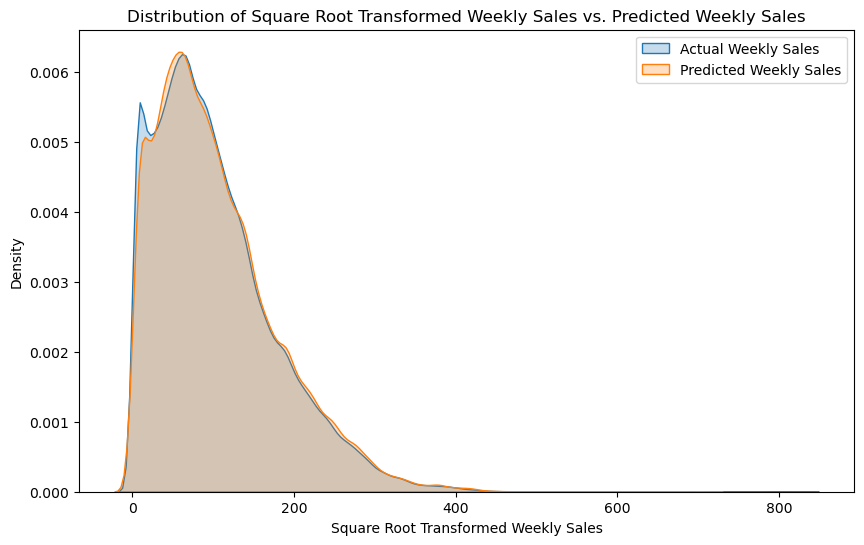

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Square root transform the data
sqrt_actual_sales = np.sqrt(train_merged_features['Weekly_Sales'][train_merged_features['Weekly_Sales'] > 0].dropna())
sqrt_predicted_sales = np.sqrt(predicted_df['Predicted_Weekly_Sales'][predicted_df['Predicted_Weekly_Sales'] > 0].dropna())

# Plot the transformed data
plt.figure(figsize=(10, 6))
sns.distplot(sqrt_actual_sales, hist=False, label='Actual Weekly Sales', kde_kws={'shade': True})
sns.distplot(sqrt_predicted_sales, hist=False, label='Predicted Weekly Sales', kde_kws={'shade': True})
plt.title('Distribution of Square Root Transformed Weekly Sales vs. Predicted Weekly Sales')
plt.xlabel('Square Root Transformed Weekly Sales')
plt.ylabel('Density')
plt.legend()
plt.show()



In [106]:
print("Average Weekly Sales:", train_merged_features['Weekly_Sales'].mean())
print("Median Weekly Sales:", train_merged_features['Weekly_Sales'].median())
print("Range of Weekly Sales:", train_merged_features['Weekly_Sales'].max() - train_merged_features['Weekly_Sales'].min())


Average Weekly Sales: 15981.25812346704
Median Weekly Sales: 7612.03
Range of Weekly Sales: 698088.2999999999


In [107]:
features_to_describe = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for feature in features_to_describe:
    print(f"Average {feature}:", train_merged_features[feature].mean())
    print(f"Median {feature}:", train_merged_features[feature].median())
    print(f"Range of {feature}:", train_merged_features[feature].max() - train_merged_features[feature].min())
    print("-----")


Average Temperature: 59.935593567127476
Median Temperature: 61.88
Range of Temperature: 94.6
-----
Average Fuel_Price: 3.38039139315297
Median Fuel_Price: 3.486
Range of Fuel_Price: 1.9769999999999999
-----
Average CPI: 171.37330680155947
Median CPI: 182.4415378
Range of CPI: 101.1688068
-----
Average Unemployment: 7.9405347298787206
Median Unemployment: 7.856
Range of Unemployment: 10.434000000000001
-----


In [108]:
# Number of missing values for MarkDown1-5
markdown_missing_values = train_merged_features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].isnull().sum()
print(markdown_missing_values)


MarkDown1    138586
MarkDown2    138586
MarkDown3    138586
MarkDown4    138586
MarkDown5    138586
dtype: int64


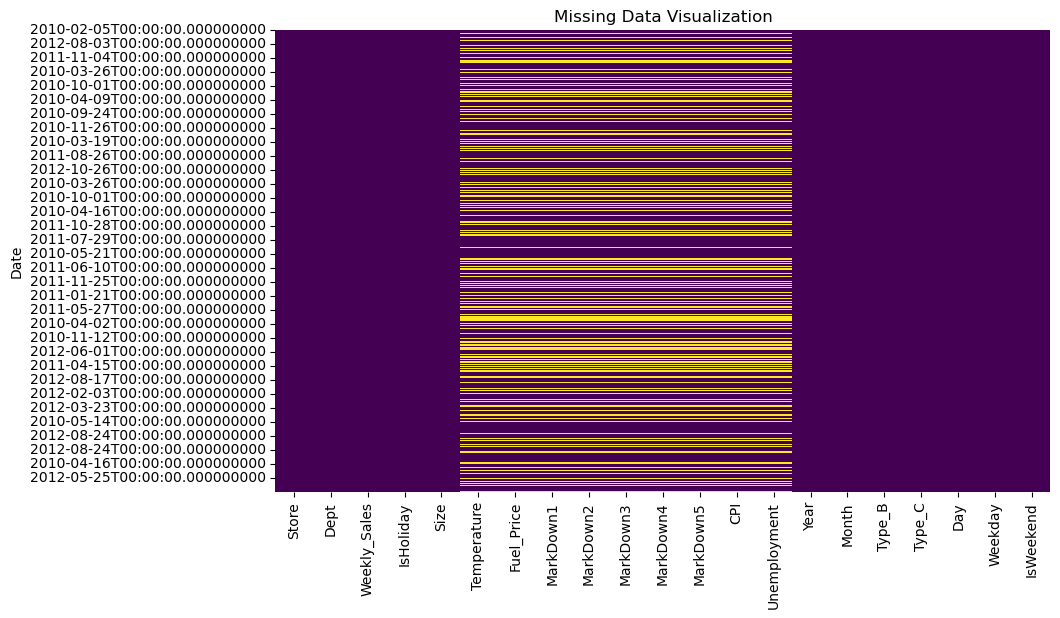

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(train_merged_features.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()


In [110]:
import matplotlib.pyplot as plt

# Group by Date and sum the weekly sales across all stores
total_weekly_sales = train_merged_features.groupby('Date')['Weekly_Sales'].sum()

# Create a list of holiday dates
holiday_dates = train_merged_features[train_merged_features['IsHoliday'] == True]['Date'].unique()

# Plotting the time series
plt.figure(figsize=(15, 6))
total_weekly_sales.plot(label='Weekly Sales', color='blue')
plt.scatter(holiday_dates, total_weekly_sales.loc[holiday_dates], color='red', label='Holiday Weeks')
plt.title('Total Weekly Sales Across All Stores')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.show()


KeyError: 'Date'

In [112]:
train_merged_features.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Type_B', 'Type_C',
       'Day', 'Weekday', 'IsWeekend'],
      dtype='object')

In [113]:
train_merged_features_new = train_merged_features.reset_index()


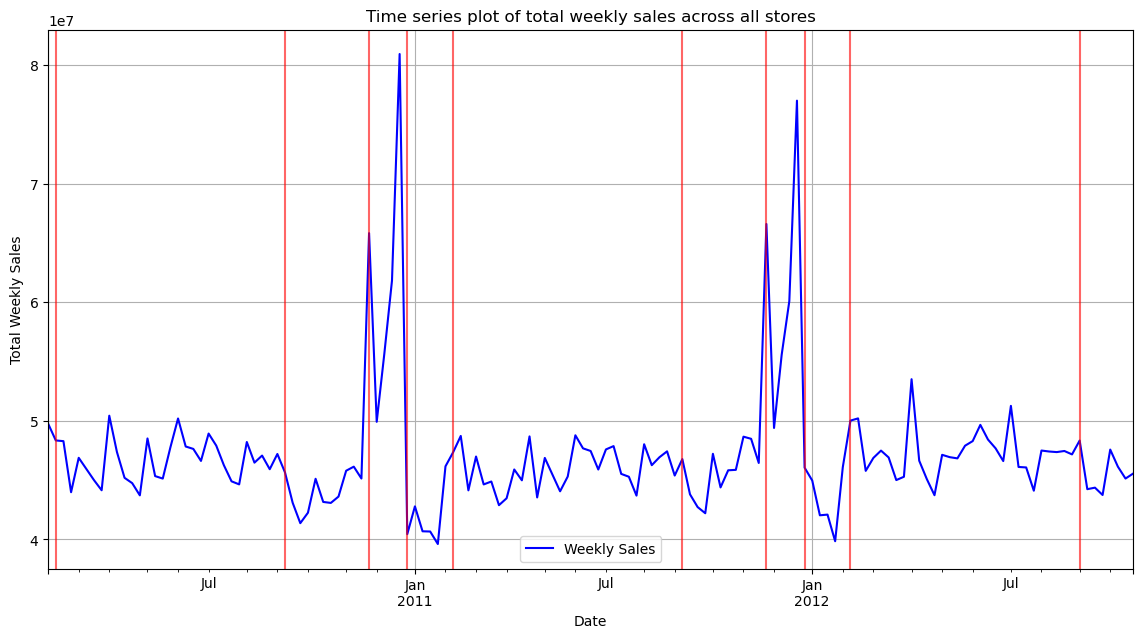

In [115]:
import matplotlib.pyplot as plt

# Grouping by Date and summing the weekly sales across all stores and departments
weekly_sales = train_merged_features_new.groupby('Date')['Weekly_Sales'].sum()

# Plotting
plt.figure(figsize=(14,7))
weekly_sales.plot(label='Weekly Sales', color='blue')
plt.title('Time series plot of total weekly sales across all stores')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')

# Highlighting the holiday weeks
holidays = train_merged_features_new[train_merged_features_new['IsHoliday'] == 1]['Date'].unique()
for holiday in holidays:
    plt.axvline(x=holiday, color='red', alpha=0.6)

plt.legend()
plt.grid(True)
plt.show()


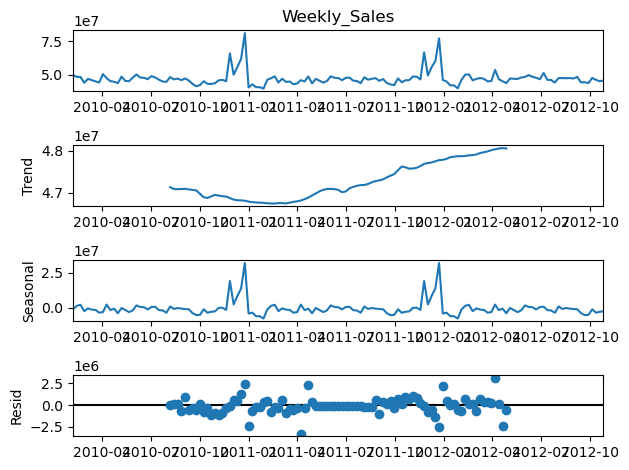

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing
result = seasonal_decompose(weekly_sales, model='additive')

# Plotting
result.plot()
plt.show()


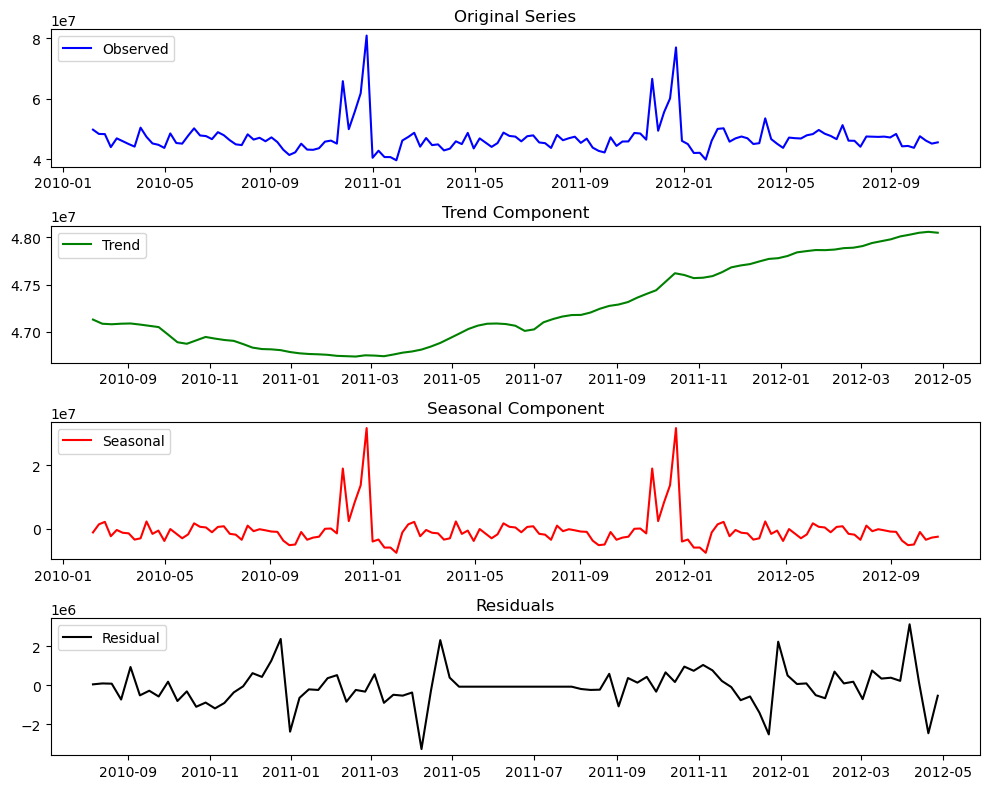

In [129]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming weekly_sales is a pandas Series with a DateTimeIndex

# Decomposing
result = seasonal_decompose(weekly_sales, model='additive')

# Plotting the decomposition components manually for better control and clarity

fig, axes = plt.subplots(4, 1, figsize=(10, 8))

# Original Time Series
axes[0].plot(weekly_sales.index, result.observed, label='Observed', color='blue')
axes[0].legend(loc='upper left')
axes[0].set_title('Original Series')

# Trend
axes[1].plot(weekly_sales.index, result.trend, label='Trend', color='green')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend Component')

# Seasonality
axes[2].plot(weekly_sales.index, result.seasonal, label='Seasonal', color='red')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal Component')

# Residuals
axes[3].plot(weekly_sales.index, result.resid, label='Residual', color='black')
axes[3].legend(loc='upper left')
axes[3].set_title('Residuals')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


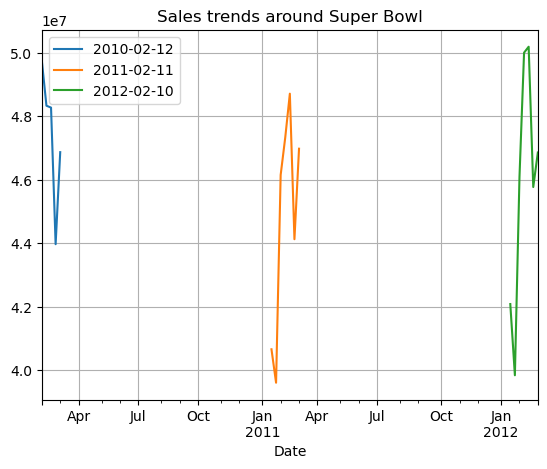

In [118]:
# Aggregate weekly sales over all stores and departments.
weekly_sales = train_merged_features_new.groupby('Date')['Weekly_Sales'].sum()

# Now, the Super Bowl analysis:
super_bowl_dates = ['2010-02-12', '2011-02-11', '2012-02-10']
weeks_before_after = 3

for date in super_bowl_dates:
    subset = weekly_sales[pd.to_datetime(date) - pd.DateOffset(weeks=weeks_before_after): pd.to_datetime(date) + pd.DateOffset(weeks=weeks_before_after)]
    subset.plot(label=date)

plt.title('Sales trends around Super Bowl')
plt.legend()
plt.grid(True)
plt.show()


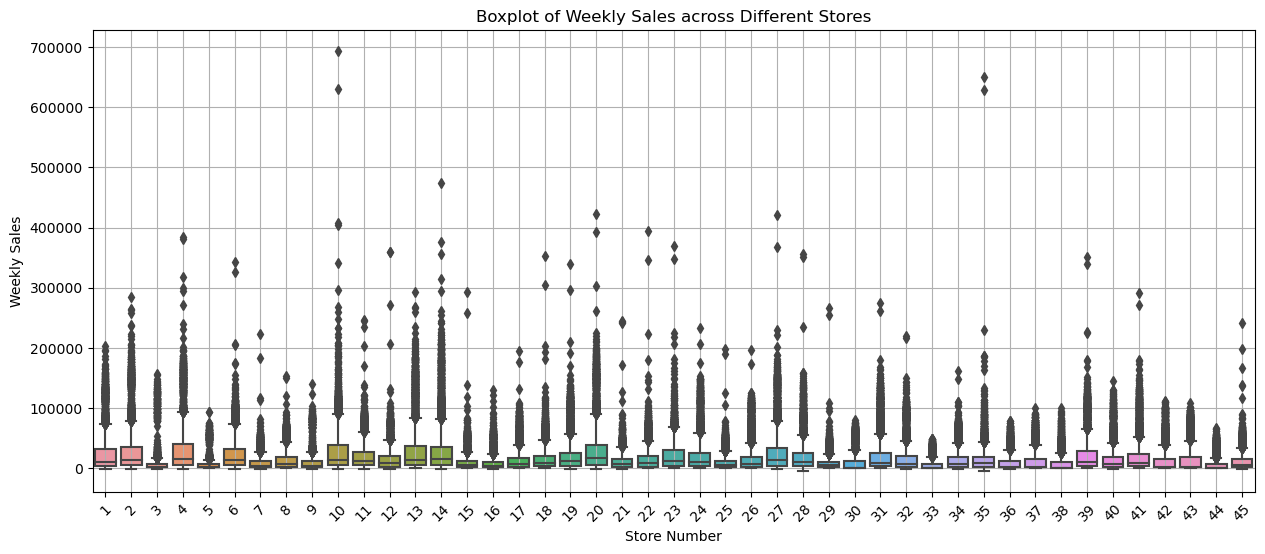

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for different stores
plt.figure(figsize=(15, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=train_merged_features)
plt.title('Boxplot of Weekly Sales across Different Stores')
plt.ylabel('Weekly Sales')
plt.xlabel('Store Number')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


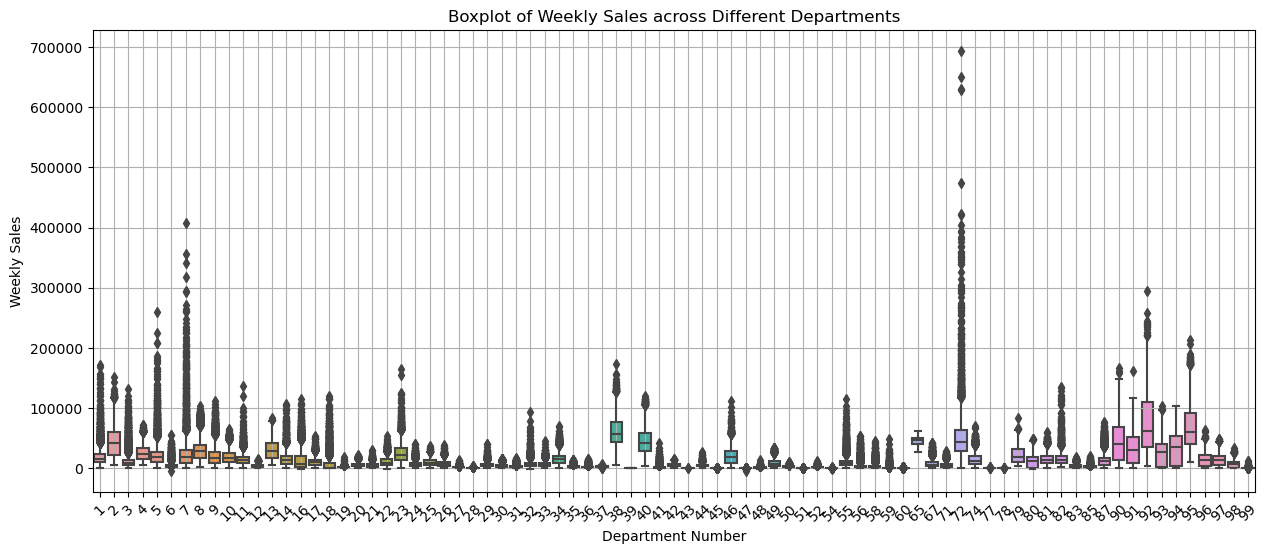

In [121]:
# Boxplot for different departments
plt.figure(figsize=(15, 6))
sns.boxplot(x='Dept', y='Weekly_Sales', data=train_merged_features)
plt.title('Boxplot of Weekly Sales across Different Departments')
plt.ylabel('Weekly Sales')
plt.xlabel('Department Number')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


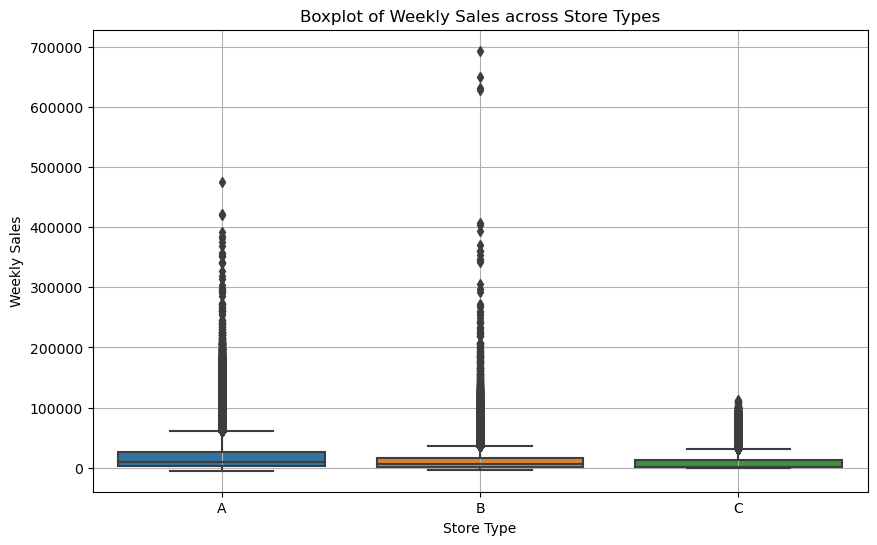

In [122]:
# Creating a 'Type' column
train_merged_features['Type'] = 'A'
train_merged_features.loc[train_merged_features['Type_B'] == 1, 'Type'] = 'B'
train_merged_features.loc[train_merged_features['Type_C'] == 1, 'Type'] = 'C'

# Boxplot for store type vs. sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=train_merged_features)
plt.title('Boxplot of Weekly Sales across Store Types')
plt.ylabel('Weekly Sales')
plt.xlabel('Store Type')
plt.grid(True)
plt.show()


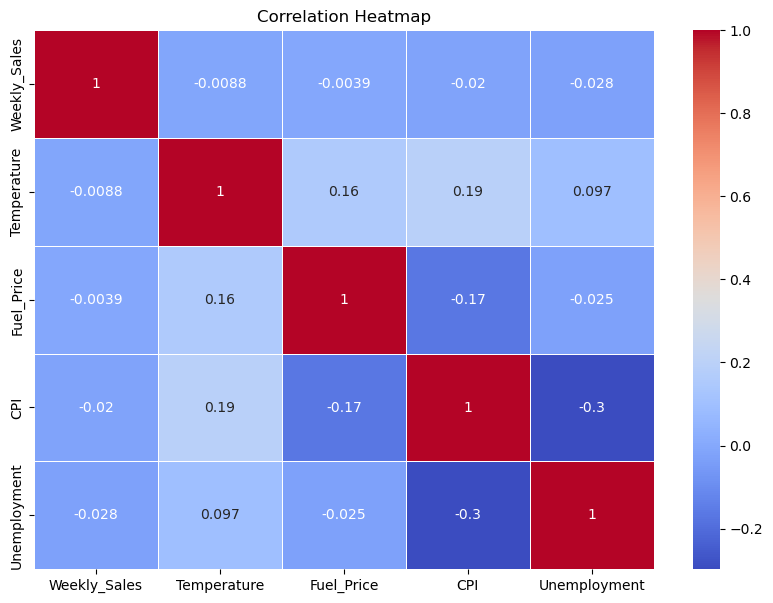

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns
correlation_data = train_merged_features[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

# Calculating the correlation matrix
corr_matrix = correlation_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


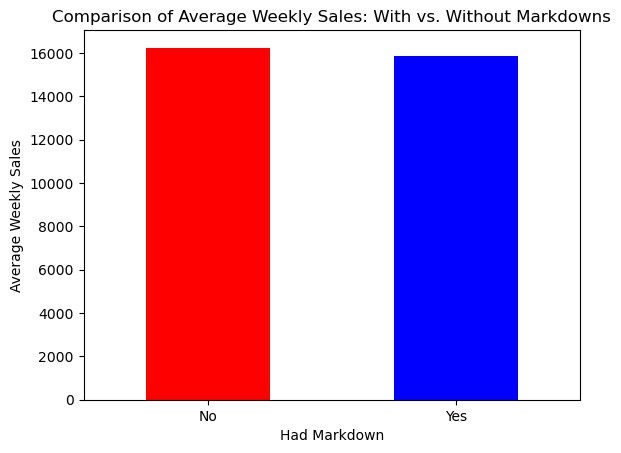

In [124]:
# Creating a column that indicates if a week had any markdowns
train_merged_features['Has_Markdown'] = train_merged_features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].notna().any(axis=1)

# Grouping data by the presence of markdowns and calculating average sales
markdown_sales = train_merged_features.groupby('Has_Markdown')['Weekly_Sales'].mean()

# Plotting
markdown_sales.plot(kind='bar', color=['red', 'blue'])
plt.title("Comparison of Average Weekly Sales: With vs. Without Markdowns")
plt.ylabel("Average Weekly Sales")
plt.xlabel("Had Markdown")
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


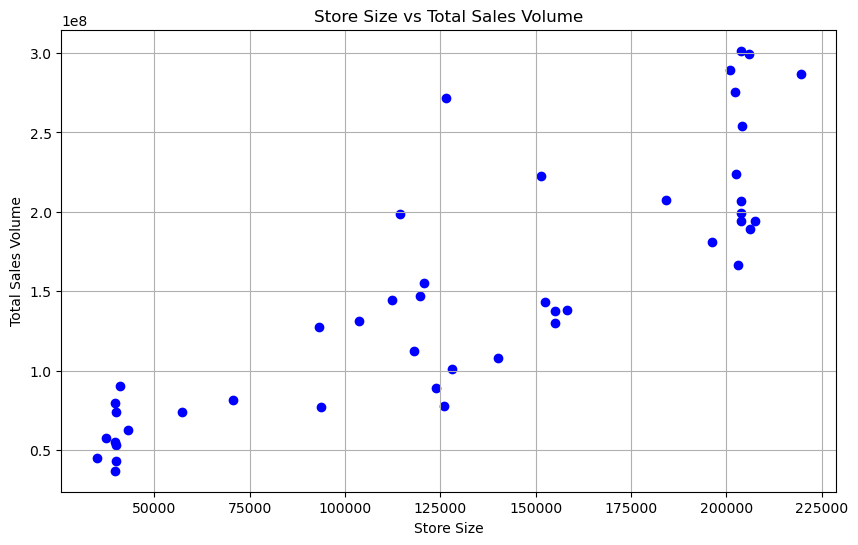

In [125]:
# Scatter plot of store size vs. total sales volume
store_sales = train_merged_features.groupby('Store')['Weekly_Sales'].sum()
store_size = train_merged_features.groupby('Store')['Size'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(store_size, store_sales, color='blue')
plt.title('Store Size vs Total Sales Volume')
plt.xlabel('Store Size')
plt.ylabel('Total Sales Volume')
plt.grid(True)
plt.show()


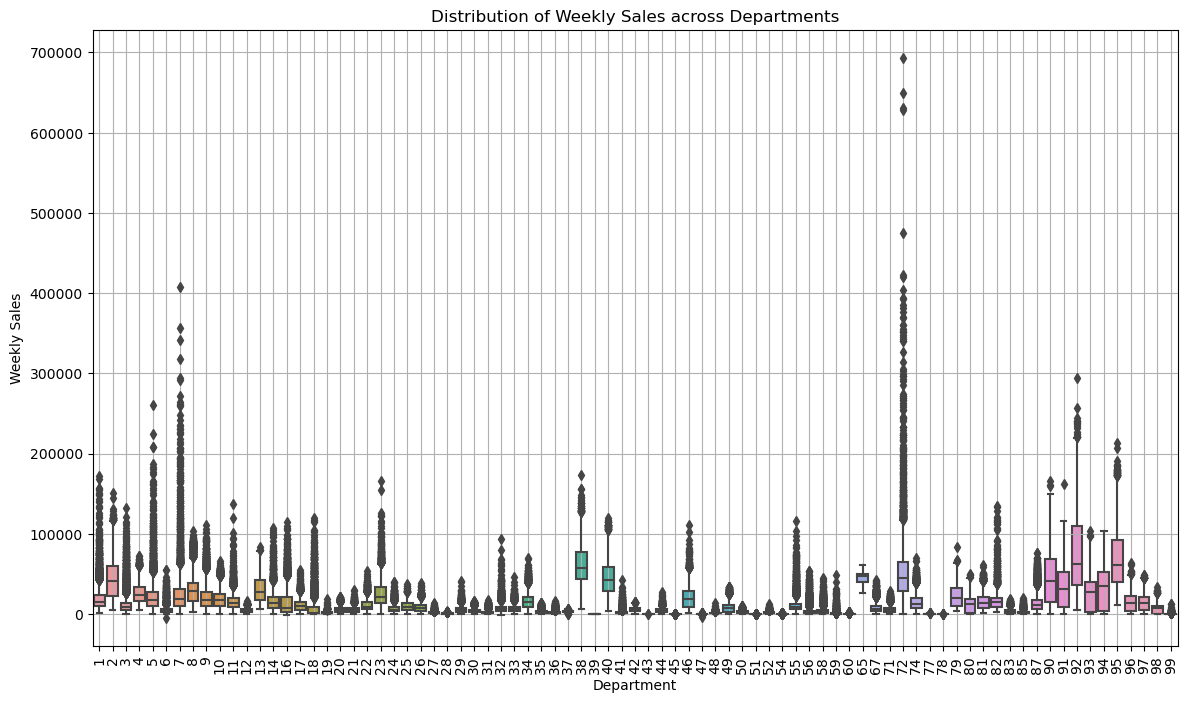

In [126]:
# Boxplot of sales across departments
plt.figure(figsize=(14, 8))
sns.boxplot(data=train_merged_features, x='Dept', y='Weekly_Sales')
plt.title('Distribution of Weekly Sales across Departments')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


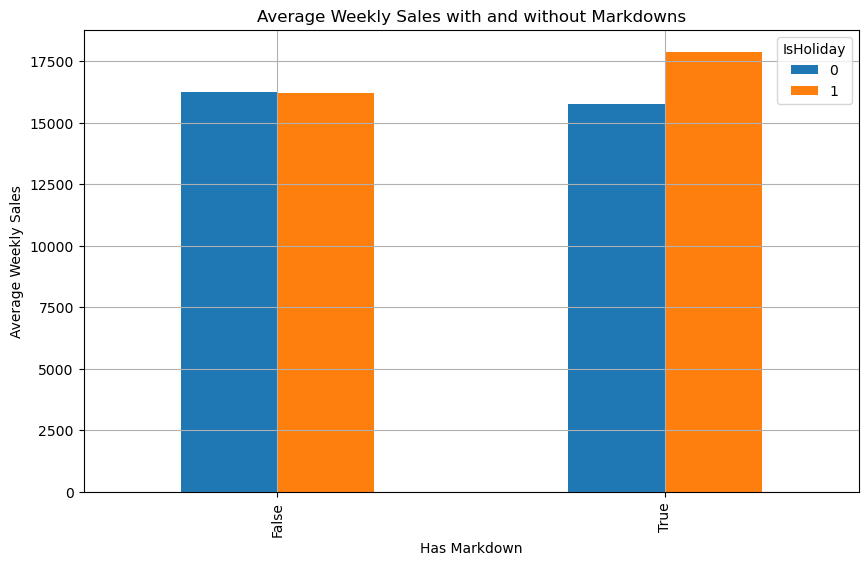

In [127]:
# Compute average sales during weeks with and without markdowns
train_merged_features['Has_Markdown'] = train_merged_features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].notna().any(axis=1)
avg_sales_markdown = train_merged_features.groupby(['Has_Markdown', 'IsHoliday'])['Weekly_Sales'].mean().unstack()

avg_sales_markdown.plot(kind='bar', figsize=(10, 6))
plt.title('Average Weekly Sales with and without Markdowns')
plt.xlabel('Has Markdown')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()


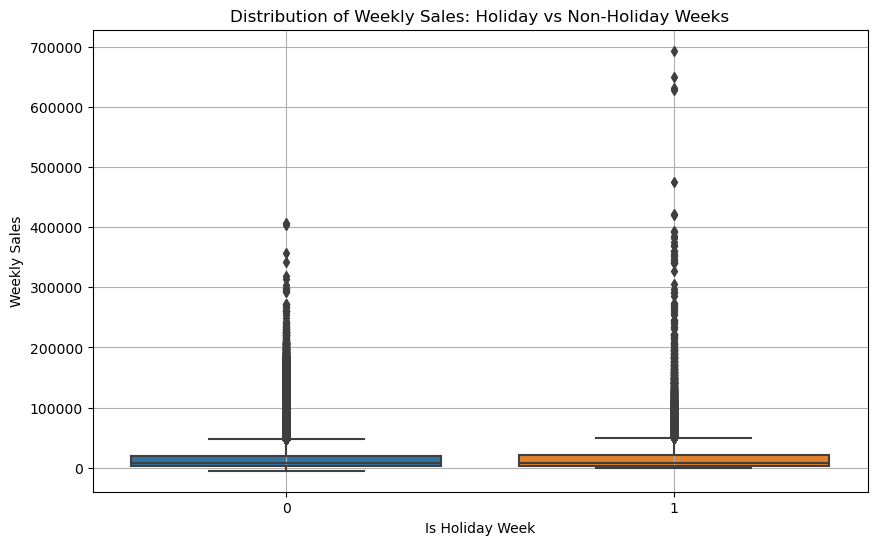

In [128]:
# Boxplot comparing sales on holiday weeks vs. non-holiday weeks
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_merged_features, x='IsHoliday', y='Weekly_Sales')
plt.title('Distribution of Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday Week')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()
